# Phishing Website Detection by Machine Learning Techniques

In [2]:
!pip install -U scikit-learn
# Imports
!matplotlib inline
!pip install pandas


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
/bin/bash: matplotlib: command not found

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [3]:
import pandas as pd

# Read The Data

In [7]:
# Load the malicious URLs
malicious_df_1 = pd.read_csv('verified_online.csv')
# Assuming 'url' column contains the URLs

# Load the benign URLs
# Assuming 'top-1m.csv' has URLs in a specific column, adjust the column index/name accordingly
benign_df = pd.read_csv('top-1m.csv', header=None, names=['url'])


In [8]:
# Read the downloaded text file into a DataFrame
with open("feed.txt", "r") as file:
    lines = file.readlines()

# Create a DataFrame from the lines
malicious_df_2 = pd.DataFrame(lines, columns=['url'])

## Malicious_df + Malicious_df_2

In [9]:
malicious_df_1

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8443292,https://client-allegro.earchiwum.pl/doc/95ac87...,http://www.phishtank.com/phish_detail.php?phis...,2024-02-06T12:10:01+00:00,yes,2024-02-06T12:12:58+00:00,yes,Allegro
1,8443283,https://ocbcc-sg-bankiingsg.com/x/,http://www.phishtank.com/phish_detail.php?phis...,2024-02-06T11:51:07+00:00,yes,2024-02-06T11:52:38+00:00,yes,Other
2,8443257,https://bnpparibasn.eu/,http://www.phishtank.com/phish_detail.php?phis...,2024-02-06T11:10:16+00:00,yes,2024-02-06T11:12:56+00:00,yes,Other
3,8443256,https://bnpparibasn.eu:443/,http://www.phishtank.com/phish_detail.php?phis...,2024-02-06T11:10:11+00:00,yes,2024-02-06T11:12:56+00:00,yes,Other
4,8443255,http://bnpparibasn.eu/,http://www.phishtank.com/phish_detail.php?phis...,2024-02-06T11:10:10+00:00,yes,2024-02-06T11:12:56+00:00,yes,Other
...,...,...,...,...,...,...,...,...
45563,3573703,http://www.ezblox.site/free/jennifer111/helpdesk,http://www.phishtank.com/phish_detail.php?phis...,2015-11-03T14:41:38+00:00,yes,2016-03-15T18:51:08+00:00,yes,Other
45564,2042606,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...,http://www.phishtank.com/phish_detail.php?phis...,2013-09-30T13:24:39+00:00,yes,2013-10-01T13:33:17+00:00,yes,Other
45565,1865971,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...,http://www.phishtank.com/phish_detail.php?phis...,2013-05-28T15:59:31+00:00,yes,2013-05-28T22:13:12+00:00,yes,Other
45566,1460953,http://www.habbocreditosparati.blogspot.com/,http://www.phishtank.com/phish_detail.php?phis...,2012-06-14T15:19:26+00:00,yes,2012-06-14T15:29:11+00:00,yes,Sulake Corporation


In [10]:
malicious_df_2

,url
0,https://mapofdavid.wixsite.com/my-site-2\n
1,http://new-sitehome.weeblysite.com/\n
2,https://appeal-review-case-id-8765145244.verce...
3,http://brehv.blogspot.se/\n
4,https://cbvfq.blogspot.ie/\n
...,...
495,https://jundoc-sunset-a630.trumneannmseretan.w...
496,https://share-field-7570.yralecaeaghnrsn.worke...
497,https://social-kemco-d07c.geahgmimbmru.workers...
498,https://oudslc-docs-4c58.pchgpwahni.workers.de...


In [11]:
malicious_df = pd.concat([malicious_df_1[['url']], malicious_df_2[['url']]], ignore_index=True)

In [12]:
# Extract the scheme (e.g., http, https, ftp) from each URL
malicious_df['scheme'] = malicious_df['url'].str.extract(r'^(.*?)://')

# Find unique schemes in the 'scheme' column
unique_schemes = malicious_df['scheme'].unique()

# Display the unique schemes
unique_schemes

array(['https', 'http'], dtype=object)

In [13]:
# Replace 'http://' with an empty string
malicious_df['url'] = malicious_df['url'].str.replace('http://', '', regex=False)

# Similarly, replace 'https://' with an empty string
malicious_df['url'] = malicious_df['url'].str.replace('https://', '', regex=False)

In [14]:
malicious_df

,url,scheme
0,client-allegro.earchiwum.pl/doc/95ac87ff753e96...,https
1,ocbcc-sg-bankiingsg.com/x/,https
2,bnpparibasn.eu/,https
3,bnpparibasn.eu:443/,https
4,bnpparibasn.eu/,http
...,...,...
46063,jundoc-sunset-a630.trumneannmseretan.workers.d...,https
46064,share-field-7570.yralecaeaghnrsn.workers.dev/4...,https
46065,social-kemco-d07c.geahgmimbmru.workers.dev/1a4...,https
46066,oudslc-docs-4c58.pchgpwahni.workers.dev/d698e3...,https


In [15]:
# Check for duplicates based on the 'url' column
duplicates = malicious_df.duplicated(subset=['url'], keep=False)

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Display duplicate rows if any
if num_duplicates > 0:
    print("Number of duplicate rows:", num_duplicates)
    print("Duplicate Rows:")
    print(malicious_df[duplicates])
else:
    print("No duplicates found.")

Number of duplicate rows: 679
Duplicate Rows:
                                                     url scheme
2                                        bnpparibasn.eu/  https
4                                        bnpparibasn.eu/   http
21     bafybeiggi5jjnwfxl6263jd57i5jvqdnhmp7yj33cicem...  https
22     bafybeiggi5jjnwfxl6263jd57i5jvqdnhmp7yj33cicem...   http
59                                        dentmed.uz/brr   http
...                                                  ...    ...
45537                     alareentading-catalog.page.tl/  https
45540                        smsenligne.myfreesites.net/   http
45542                     templat65sldh.myfreesites.net/   http
45555                         sertyxese.myfreesites.net/   http
45560                     alareentading-catalog.page.tl/   http

[679 rows x 2 columns]


In [16]:
# Remove duplicate rows based on a specific column
malicious_df.drop_duplicates(subset=['url'],keep='first',inplace=True)

# Display the modified DataFrame
malicious_df

,url,scheme
0,client-allegro.earchiwum.pl/doc/95ac87ff753e96...,https
1,ocbcc-sg-bankiingsg.com/x/,https
2,bnpparibasn.eu/,https
3,bnpparibasn.eu:443/,https
5,servicepflege-kontoaktualisieren383266.codeany...,https
...,...,...
46063,jundoc-sunset-a630.trumneannmseretan.workers.d...,https
46064,share-field-7570.yralecaeaghnrsn.workers.dev/4...,https
46065,social-kemco-d07c.geahgmimbmru.workers.dev/1a4...,https
46066,oudslc-docs-4c58.pchgpwahni.workers.dev/d698e3...,https


In [17]:
missing_proportion = malicious_df.apply(lambda x: sum(x.isna()) / len(malicious_df))
missing_proportion

url       0.0
scheme    0.0
dtype: float64

## Benign_df

In [18]:
benign_df

,url
1,google.com
2,youtube.com
3,facebook.com
4,baidu.com
5,wikipedia.org
...,...
999996,sibf.org
999997,bukapintu.co
999998,klatovynet.cz
999999,elconquistadorfm.cl


In [19]:
# Check for duplicates based on the 'url' column
duplicates = benign_df.duplicated(subset=['url'], keep=False)

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Display duplicate rows if any
if num_duplicates > 0:
    print("Number of duplicate rows:", num_duplicates)
    print("Duplicate Rows:")
    print(benign_df[duplicates])
else:
    print("No duplicates found.")

No duplicates found.


In [20]:
#to balance the data
benign_df= benign_df.loc[range(1,46000)]

In [21]:
benign_df

,url
1,google.com
2,youtube.com
3,facebook.com
4,baidu.com
5,wikipedia.org
...,...
45995,evysledky.com
45996,zhongguozhaoshang.com
45997,militaryfactory.com
45998,clashofclans.com


In [22]:
# Extract the scheme (e.g., http, https, ftp) from each URL
benign_df['scheme'] = benign_df['url'].str.extract(r'^(.*?)://')

# Find unique schemes in the 'scheme' column
unique_schemes = benign_df['scheme'].unique()

# Display the unique schemes
unique_schemes

array([nan], dtype=object)

In [23]:
benign_df

,url,scheme
1,google.com,NaN
2,youtube.com,NaN
3,facebook.com,NaN
4,baidu.com,NaN
5,wikipedia.org,NaN
...,...,...
45995,evysledky.com,NaN
45996,zhongguozhaoshang.com,NaN
45997,militaryfactory.com,NaN
45998,clashofclans.com,NaN


In [24]:
missing_proportion = benign_df.apply(lambda x: sum(x.isna()) / len(benign_df))
missing_proportion

url       0.0
scheme    1.0
dtype: float64

In [25]:
malicious_df['label'] = 1  # Label malicious URLs as 1
benign_df['label'] = 0  # Label benign URLs as 0

In [26]:
combined_df = pd.concat([malicious_df[['url', 'label']], benign_df[['url', 'label']]], ignore_index=True)

In [38]:
combined_df.head(40)

,url,label
0,client-allegro.earchiwum.pl/doc/95ac87ff753e96...,1
1,ocbcc-sg-bankiingsg.com/x/,1
2,bnpparibasn.eu/,1
3,bnpparibasn.eu:443/,1
4,servicepflege-kontoaktualisieren383266.codeany...,1
5,servicepflege-kontoaktualisieren383266.codeany...,1
6,docs.google.com/presentation/d/e/2PACX-1vQ5F5D...,1
7,tinyurl.com/3j5f7tdu,1
8,webde-102409.weeblysite.com/,1
9,webde-100241.weeblysite.com/,1


label
0    45999
1    45727
Name: count, dtype: int64


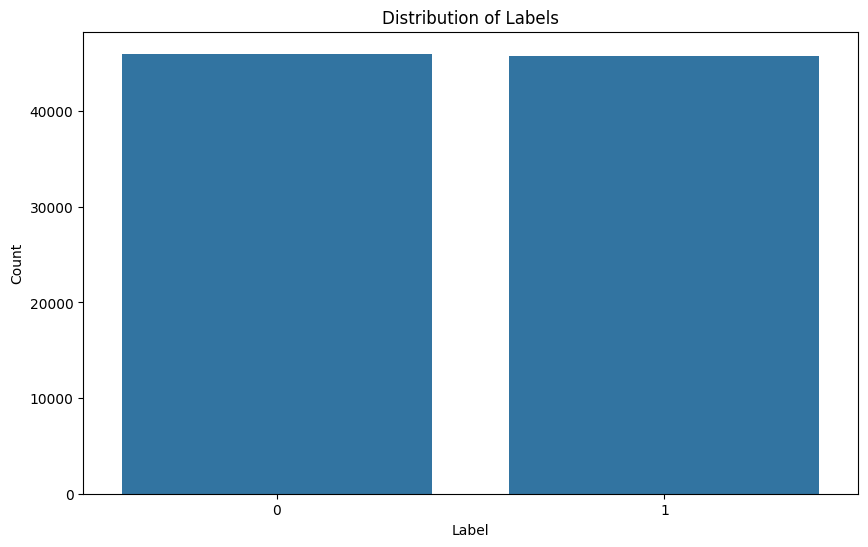

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

label_counts = combined_df['label'].value_counts()
print(label_counts)

# Plotting the distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=combined_df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [201]:
# Check for duplicates based on the 'url' column
d = combined_df.duplicated(subset=['url'], keep=False)

# Count the number of duplicate rows
num_duplicates = d.sum()

# Display duplicate rows if any
if num_duplicates > 0:
    print("Number of duplicate rows:", num_duplicates)
    print("Duplicate Rows:")
    print(combined_df[d])
else:
    print("No duplicates found.")

No duplicates found.


In [202]:
# Export the combined DataFrame to a CSV file
combined_df.to_csv('combined_df.csv', index=False)

# Print a message indicating successful export
print("Combined data exported to combined_data.csv")

Combined data exported to combined_data.csv


In [40]:
from urllib.parse import urlparse
# Print the "url" column from the first row
print("First URL in the DataFrame:", combined_df.iloc[35]["url"])

# Function to extract domain from URL
def extract_domain(url):
    parsed_url = urlparse(url)
    print(parsed_url)
    # print(parsed_url)
    domain = parsed_url.netloc
    print(domain)
    if domain.startswith("www."):
        return domain[4:]
    else:
        return domain
    
# Extracting domain from the URL in the first row
first_url = combined_df.iloc[35]["url"]
first_url = "http://" + first_url
print(first_url)
domain = extract_domain(first_url)

# Printing the extracted domain
print("Domain from the first URL:", domain)

First URL in the DataFrame: www.stargrowth.com.br/biller.html
http://www.stargrowth.com.br/biller.html
ParseResult(scheme='http', netloc='www.stargrowth.com.br', path='/biller.html', params='', query='', fragment='')
www.stargrowth.com.br
Domain from the first URL: stargrowth.com.br
